<a href="https://colab.research.google.com/github/Honghai2102/AIO-EXERCISE/blob/feature%2FM04EX03/Basic_Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline


def load_data_from_file(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, dtype=None, delimiter=',', skip_header=1)

  features_X = data[:, :3]
  sales_Y = data[:, 3]
  intercept = np.ones((features_X.shape[0], 1))
  features_X = np.concatenate((intercept, features_X), axis=1)

  return features_X, sales_Y

##### Question 1

In [ ]:
print(f'Length of chromosome: 4')

Length of chromosome: 4


##### Question 2

In [ ]:
features_X, _ = load_data_from_file('advertising.csv')
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


##### Question 3

In [ ]:
_, sales_Y = load_data_from_file('advertising.csv')
print(sales_Y.shape)

(200,)


# Exercise 2

In [ ]:
def generate_random_value(bound=10):
    return (random.random() - 0.5)*bound


def create_individual(n=4, bound=10):
    individual = [generate_random_value(bound=bound) for _ in range(n)]
    return individual

individual = create_individual()
print(individual)

[4.097462559682401, 4.827854760376531, 3.1021723599658957, 4.021659504395827]


# Exercise 3

In [ ]:
features_X, sales_Y = load_data_from_file('advertising.csv')


def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss


def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1 / (loss + 1)
    return fitness_value

##### Question 4

In [ ]:
features_X, sales_Y = load_data_from_file('advertising.csv')
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


# Exercise 4

In [ ]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new

##### Question 5

In [ ]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57,-0.79,-2.41]
individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


# Exercise 5

In [ ]:
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()

    for i in range(len(individual1)):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()

    return individual_m

##### Question 6

In [ ]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


# Exercise 6

In [ ]:
def initializePopulation(m):
    population = [create_individual() for _ in range(m)]
    return population

# Exercise 7

In [ ]:
def selection(sorted_old_population, m=100):
    index1 = random.randint(0, m-1)

    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

# Exercise 8

In [ ]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen % 1 == 0:
        print("Best loss:", compute_loss(
            sorted_population[m-1]), "with chromosome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m - elitism:
        # selection
        parent1 = selection(sorted_population)
        parent2 = selection(sorted_population)

        # crossover
        child1, child2 = crossover(parent1, parent2)

        # mutation
        child1 = mutate(child1, mutation_rate=0.05)
        child2 = mutate(child2, mutation_rate=0.05)

        new_population.append(child1)
        if len(new_population) < m - elitism:
            new_population.append(child2)

    #  copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m-1])

##### Question 7

In [ ]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57,-0.79,-2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromosome:  [3.44, 2.57, -0.79, -2.41]


# Exercise 9

In [ ]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file('advertising.csv')
    population = initializePopulation(m)
    losses_list = []

    for i in range(n_generations):
        population, losses = create_new_population(
            population, elitism=2, gen=i)
        losses_list.append(losses)

    return losses_list, population

# Exercise 10

Best loss: 538.9923834519653 with chromosome:  [0.9622434937561142, 0.03459440574125505, 1.5893145872317826, -0.6173218832444194]
Best loss: 109.01391826259915 with chromosome:  [0.9622434937561142, 0.03459440574125505, 0.223719682559973, 0.33494608164832185]
Best loss: 74.46259462442518 with chromosome:  [-2.973745205565901, 0.03459440574125505, 0.223719682559973, 0.33494608164832185]
Best loss: 51.87633441553355 with chromosome:  [0.34174488486649834, 0.05854134468573746, -0.1095008674685094, 0.33494608164832185]
Best loss: 14.501815248384482 with chromosome:  [3.9195287743544114, 0.0692849941161322, 0.223719682559973, -0.048566243306484846]
Best loss: 7.292269699721089 with chromosome:  [0.9622434937561142, 0.0692849941161322, 0.223719682559973, -0.048566243306484846]
Best loss: 7.292269699721089 with chromosome:  [0.9622434937561142, 0.0692849941161322, 0.223719682559973, -0.048566243306484846]
Best loss: 7.292269699721089 with chromosome:  [0.9622434937561142, 0.0692849941161322, 

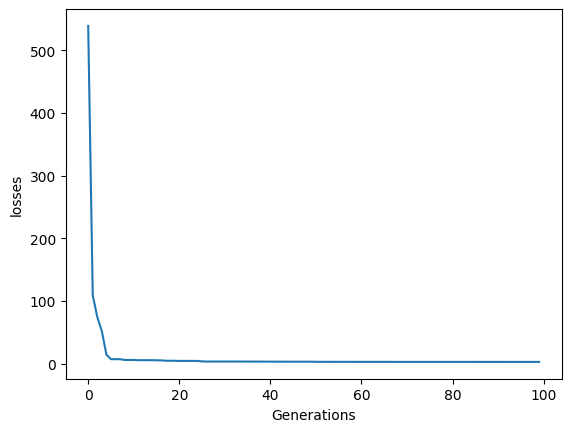

In [ ]:
def visualize_loss(losses_list):
    plt.plot(range(len(losses_list)), losses_list)
    plt.xlabel('Generations')
    plt.ylabel('losses')
    plt.show()

losses_list, population = run_GA()
visualize_loss(losses_list)


# Exercise 11

[3.9339786720470182, 0.05854134468573746, 0.1265491189862622, -0.011706053109969972]


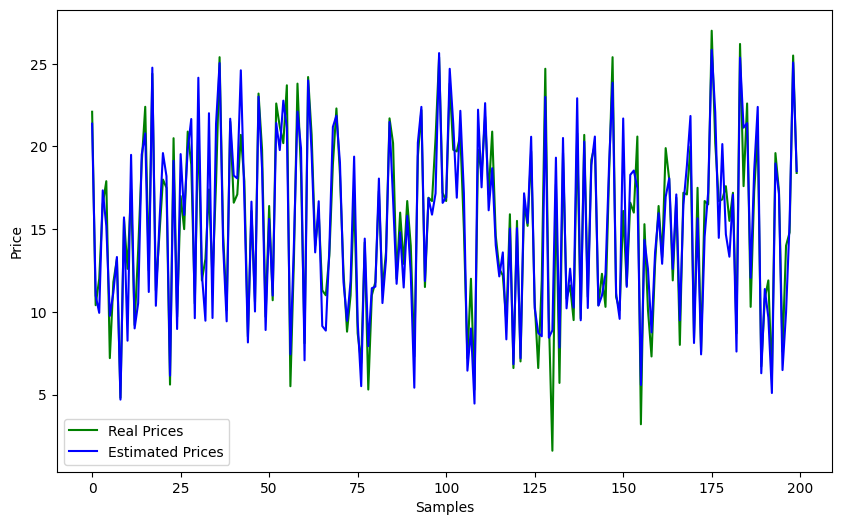

In [ ]:
def visualize_predict_gt():
    # visualization of ground truth and predict value
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])

    estimated_prices = []
    for feature in features_X:
        estimated_price = np.dot(feature, theta)
        estimated_prices.append(estimated_price)

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()

visualize_predict_gt()